# Regionalisation of the 2014-2020 payments dataset

The first operation is to import all the relevant libraries one will be working with

In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Import all the relevant data files

_annual_ contains all the yearly payments to be regionalised, _mapping_ is the look-up table for the attribution of the payments at different
granularity through the correspondence between the payment _CCI-code_ and the _NUTS_ area; _population_ includes the population figures at the _NUTS2_ granularity level; _wealth_ maps the _NUTS2_ regions onto the development categories _More developed, Transitional, Less developed_ or the geographical category _Outermost or Northern Sparsely Populated_.

In [2]:
df_annual = pd.read_csv('ESIF_2014-2020_EU_payments__daily_update_.csv')
df_mapping = pd.read_csv('ESIF_2014-2020_-_LOOKUP_TABLE_-_ERDF_ESF_CF_Programme_Coverage_VS_NUTS_V2010.csv').dropna()
df_mapping_EAFRD = pd.read_excel('NUTS EAFRD plus.xlsx',sheet_name='ESIF_2014-2020_-_LOOKUP_EAFRD').dropna()
df_mapping_EAFRD.loc[df_mapping_EAFRD['NUTS_(2010)_code']=='DED ','NUTS_(2010)_code']='DED'
df_population = pd.read_excel('2019.07.11_Population_1January.xlsx',sheet_name='Sheet 1',header=10).iloc[:,::2]
df_wealth = pd.read_excel('NUTS2list_with_objectives.xls',sheet_name='MASTER NUTS-2 LIST 2007-2020',header=0,
                         usecols=[0,1,2,3,5,8])
df_mapping = pd.concat([df_mapping,df_mapping_EAFRD])
df_annual.loc[df_annual.CCI=='2014SE16RFOP007','Category of region'] = 'More developed'
df_annual.loc[df_annual.CCI=='2014SE16RFOP008','Category of region'] = 'More developed'

#### Harmonising the NUTS codes across datasets

The blocks of code presented below are aimed at harmonising the _NUTS_ nomenclatures across datasets. The standard is the _NUTS-2010_ scheme. The population figures are presented according to the _NUTS-2016_ nomenclature. This requires a double mapping of this latter onto the corresponding _NUTS-2013_ scheme, which is in turn mapped onto the _NUTS-2010_. The development categories are listed as per the _NUTS-2006_ format, which needs to be updated to _NUTS-2010_.

In [3]:
df_wealth.loc[df_wealth.MS=='GR','MS']='EL'
df_wealth.loc[df_wealth['NUTS-2'].str[:2]=='GR','NUTS-2']='EL'+df_wealth['NUTS-2'].str[2:]
df_wealth.loc[df_wealth['NUTS-2'].str[:3]=='ITD','NUTS-2']='ITH'+df_wealth['NUTS-2'].str[3:]
df_wealth.loc[df_wealth['NUTS-2'].str[:3]=='ITE','NUTS-2']='ITI'+df_wealth['NUTS-2'].str[3:]
df_wealth.loc[(df_wealth['NUTS-2']=='FI13')|(df_wealth['NUTS-2']=='FI1A'),'NUTS-2']='FI1D'
df_wealth.loc[(df_wealth['NUTS-2']=='DE41')|(df_wealth['NUTS-2']=='DE42'),'NUTS-2']='DE40'
df_wealth.loc[df_wealth['NUTS-2']=='DED1','NUTS-2']='DED4'
df_wealth.loc[df_wealth['NUTS-2']=='DED3','NUTS-2']='DED5'
df_wealth.loc[df_wealth['NUTS-2']=='FI18','NUTS-2']='FI1B'
df_wealth.loc[df_wealth['NUTS-2']=='UKD2','NUTS-2']='UKD6'
df_wealth.loc[df_wealth['NUTS-2']=='UKD5','NUTS-2']='UKD7'

In [4]:
df_population.columns = ['NUTS2',2015,2016,2017,2018]
df_population=df_population[df_population[2018]!=':']

In [5]:
df_population.loc[(df_population.NUTS2=='UKI5')|(df_population.NUTS2=='UKI6')|(df_population.NUTS2=='UKI7'),'NUTS2']='UKI2'
df_population.loc[(df_population.NUTS2=='UKI3')|(df_population.NUTS2=='UKI4'),'NUTS2']='UKI1'
df_population.loc[df_population.NUTS2=='SI04','NUTS2']='SI02'
df_population.loc[df_population.NUTS2=='SI03','NUTS2']='SI01'
df_population.loc[(df_population.NUTS2=='FRA4')|(df_population.NUTS2=='FRA5'),'NUTS2']='FR94'
df_population.loc[df_population.NUTS2=='FRA3','NUTS2']='FR93'
df_population.loc[df_population.NUTS2=='FRA2','NUTS2']='FR92'
df_population.loc[df_population.NUTS2=='FRA1','NUTS2']='FR91'
df_population.loc[(df_population.NUTS2=='FRY4')|(df_population.NUTS2=='FRY5'),'NUTS2']='FR94'
df_population.loc[df_population.NUTS2=='FRY3','NUTS2']='FR93'
df_population.loc[df_population.NUTS2=='FRY2','NUTS2']='FR92'
df_population.loc[df_population.NUTS2=='FRY1','NUTS2']='FR91'
df_population.loc[df_population.NUTS2=='EL51','NUTS2']='EL11'
df_population.loc[df_population.NUTS2=='EL52','NUTS2']='EL12'
df_population.loc[df_population.NUTS2=='EL53','NUTS2']='EL13'
df_population.loc[df_population.NUTS2=='EL54','NUTS2']='EL21'
df_population.loc[df_population.NUTS2=='EL61','NUTS2']='EL14'
df_population.loc[df_population.NUTS2=='EL62','NUTS2']='EL22'
df_population.loc[df_population.NUTS2=='EL63','NUTS2']='EL23'
df_population.loc[df_population.NUTS2=='EL64','NUTS2']='EL24'
df_population.loc[df_population.NUTS2=='EL65','NUTS2']='EL25'

# NUTS 2013 - 2016 below
df_population.loc[df_population.NUTS2=='IE04','NUTS2']='IE01'
df_population.loc[(df_population.NUTS2=='IE05')|(df_population.NUTS2=='IE06'),'NUTS2']='IE02'
df_population.loc[df_population.NUTS2=='FRB0','NUTS2']='FR24'
df_population.loc[df_population.NUTS2=='FRC1','NUTS2']='FR26'
df_population.loc[df_population.NUTS2=='FRC2','NUTS2']='FR43'
df_population.loc[df_population.NUTS2=='FRD1','NUTS2']='FR25'
df_population.loc[df_population.NUTS2=='FRD2','NUTS2']='FR23'
df_population.loc[df_population.NUTS2=='FRE1','NUTS2']='FR30'
df_population.loc[df_population.NUTS2=='FRE2','NUTS2']='FR22'
df_population.loc[df_population.NUTS2=='FRF1','NUTS2']='FR42'
df_population.loc[df_population.NUTS2=='FRF2','NUTS2']='FR21'
df_population.loc[df_population.NUTS2=='FRF3','NUTS2']='FR41'
df_population.loc[df_population.NUTS2=='FRG0','NUTS2']='FR51'
df_population.loc[df_population.NUTS2=='FRH0','NUTS2']='FR52'
df_population.loc[df_population.NUTS2=='FRI1','NUTS2']='FR61'
df_population.loc[df_population.NUTS2=='FRI2','NUTS2']='FR63'
df_population.loc[df_population.NUTS2=='FRI3','NUTS2']='FR53'
df_population.loc[df_population.NUTS2=='FRJ1','NUTS2']='FR81'
df_population.loc[df_population.NUTS2=='FRJ2','NUTS2']='FR62'
df_population.loc[df_population.NUTS2=='FRK1','NUTS2']='FR72'
df_population.loc[df_population.NUTS2=='FRK2','NUTS2']='FR71'
df_population.loc[df_population.NUTS2=='FRL0','NUTS2']='FR82'
df_population.loc[df_population.NUTS2=='FRM0','NUTS2']='FR83'
df_population.loc[(df_population.NUTS2=='LT01')|(df_population.NUTS2=='LT02'),'NUTS2']='LT00'
df_population.loc[(df_population.NUTS2=='HU11')|(df_population.NUTS2=='HU12'),'NUTS2']='HU10'
df_population.loc[df_population.NUTS2=='PL71','NUTS2']='PL11'
df_population.loc[df_population.NUTS2=='PL72','NUTS2']='PL33'
df_population.loc[df_population.NUTS2=='PL81','NUTS2']='PL31'
df_population.loc[df_population.NUTS2=='PL82','NUTS2']='PL32'
df_population.loc[df_population.NUTS2=='PL84','NUTS2']='PL34'
df_population.loc[(df_population.NUTS2=='PL91')|(df_population.NUTS2=='PL92'),'NUTS2']='PL12'
df_population.loc[(df_population.NUTS2=='UKM8')|(df_population.NUTS2=='UKM9'),'NUTS2']='UKM3'
df_population.loc[df_population.NUTS2=='UKM7','NUTS2']='UKM2'

In [6]:
df_population['NUTS1']=df_population['NUTS2'].str[:-1]
df_population['MS']=df_population['NUTS2'].str[:-2]
df_population = pd.melt(df_population, id_vars=['MS','NUTS1','NUTS2'], value_vars=[2015,2016,2017,
2018]).rename(columns={'variable':'Year','value':'Population'}).sort_values(by=['MS','NUTS1',
                                                                                'NUTS2']).dropna().reset_index(drop=True)
df_population['Population']=pd.to_numeric(df_population['Population'])

In [7]:
df_population['Population'] = df_population.groupby(['NUTS2','Year'])['Population'].transform(sum)
df_population=df_population.drop_duplicates(subset=['NUTS2', 'Year'])

df_wealth=df_wealth[df_wealth.Period=='2014-2020'].rename(columns={'NUTS-2':'NUTS2'})
df_wealth['NUTS1']=df_wealth['NUTS2'].str[:-1]

df_wealth.loc[(df_wealth.NUTS1=='FRY')|(df_wealth.NUTS2=='PT20')|(df_wealth.NUTS2=='PT30')|
                  (df_wealth.NUTS2=='SE07')|(df_wealth.NUTS2=='SE08'),'Category of region']=\
'Outermost or Northern Sparsely Populated'

#### Mapping across datasets

The development categories are mapped onto the datasets: the _NUTS2_ codes are the key for the mapping across datasets. Discrepancies due to different _NUTS_ nomenclatures are harmonised by hand with targeted commands.

In [8]:
mapping_cat = dict(df_wealth[['NUTS2', 'Category of region']].values)
df_population['Category of region'] = df_population['NUTS2'].map(mapping_cat)
df_population['Population_MS'] = df_population.groupby(['MS','Year'])['Population'].transform(sum)
df_population['Population_NUTS1'] = df_population.groupby(['NUTS1','Year'])['Population'].transform(sum)
df_population['Population_MS_category'] = df_population.groupby(['MS','Category of region',
                                                                 'Year'])['Population'].transform(sum)
df_population['Population_NUTS1_category'] = df_population.groupby(['NUTS1','Category of region',
                                                                    'Year'])['Population'].transform(sum)
df_population['MS_share']=df_population['Population']/df_population['Population_MS']
df_population['NUTS1_share']=df_population['Population']/df_population['Population_NUTS1']
df_population['MS_share_category']=df_population['Population']/df_population['Population_MS_category']
df_population['NUTS1_share_category']=df_population['Population']/df_population['Population_NUTS1_category']
df_population.loc[df_population.NUTS2=='FI1C','Category of region']='More developed'
df_population.loc[df_population.NUTS2.isin(['FRXX','HUXX']),'Category of region']='Less developed'
df_population.loc[df_population.NUTS1=='FR9','Category of region']=\
'Outermost or Northern Sparsely Populated'

In [9]:
df_mapping=df_mapping[df_mapping.CCI_code.str[4:6]!='TC']
df_mapping=df_mapping.assign(NUTS3=df_mapping['NUTS_(2010)_code'].where(df_mapping['NUTS_(2010)_code'].str.len()>4))
df_mapping=df_mapping.assign(NUTS2=df_mapping['NUTS_(2010)_code'].where(df_mapping['NUTS_(2010)_code'].str.len()==4))
df_mapping['NUTS2'] = df_mapping['NUTS2'].fillna(df_mapping.NUTS3.str[:-1])
df_mapping=df_mapping.assign(NUTS1=df_mapping['NUTS_(2010)_code'].where(df_mapping['NUTS_(2010)_code'].str.len()==3))
df_mapping[df_mapping.Programme_Short_Title.str.contains('Mayotte')]['NUTS2']='FR94'
df_mapping_EAFRD.loc[df_mapping_EAFRD.Programme_Short_Title.str.contains('Mayotte'),'NUTS_(2010)_code']='FR94'
df_mapping.loc[df_mapping.CCI_code=='2014FR16M2OP012','NUTS_(2010)_code']='FR94'
df_mapping.loc[(df_mapping.CCI_code=='2014FR05M9OP001')&(df_mapping['NUTS_(2010)_code']=='FRZZ')]='FR9'
df_mapping[(df_mapping.NUTS2=='UKZZ')&(df_mapping.Programme_Short_Title.str.contains('Wales'))]['NUTS2']='UKL1'
mapping_wealth = dict(df_wealth[['NUTS2', 'Category of region']].values)
df_mapping['Category of region'] = df_mapping['NUTS2'].map(mapping_wealth).fillna('void')
df_mapping[df_mapping['NUTS2']=='FI1C']['Category of region']='More developed'
df_mapping[(df_mapping.NUTS2=='UKZZ')&(df_mapping.Programme_Short_Title.str.contains('Gibraltar'))]['Category of region']=\
'More developed'
df_mapping.loc[df_mapping['NUTS_(2010)_code'].str.contains('FR9'),'Category of region']=\
'Outermost or Northern Sparsely Populated'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

### Preparation of the EC payment datasets for the regionalisation

The dataframe is initially sliced so as to include only the relevant columns. The _Interregio_ programme is then dropped along potential sources of double counting (i.e. _IPAE-contribution from ERDF_ and _YEI Specific Allocation_). Annual figures are obtained from the cumulative ones through row-wise subtractions.

In [10]:
df_annual_r = df_annual.loc[:,['MS','CCI','Category of region','Year','Fund','Net interim payments']].copy()
df_annual_r.loc[df_annual_r['Category of region']=='Transition','Category of region']='Transitional'
df_annual_r = df_annual_r[(df_annual_r.Year!=2019)&(df_annual_r.Fund!='IPAE-contribution from ERDF')
                         &(df_annual_r.Fund!='YEI ESF Matching Component')&(df_annual_r.Fund!='YEI Specific Allocation')&
                         (df_annual_r.MS!='TC')]
df_annual_r = df_annual_r.sort_values(by=['CCI','Fund','Category of region','Year']).reset_index(drop=True)
df_annual_r['Category of region']=df_annual_r['Category of region'].fillna('void')
df_annual_r['Net interim payments']=pd.to_numeric(df_annual_r['Net interim payments'].str.replace(',', ''))

df_annual_r['Net yearly interim payments'] = df_annual_r.groupby(['MS','CCI','Category of region','Fund',
                                                                  'Year'])['Net interim payments'].transform('sum')

df_annual_r = df_annual_r.drop_duplicates(subset=['MS','CCI','Category of region','Fund','Year'])

df_annual_r['Payments']=df_annual_r.groupby(['CCI','Fund',
                            'Category of region'])['Net yearly interim payments'].diff().fillna(df_annual_r['Net yearly interim payments'])

In [11]:
df_mapping_EAFRD=df_mapping_EAFRD.assign(NUTS2=df_mapping_EAFRD['NUTS_(2010)_code'].where(df_mapping_EAFRD['NUTS_(2010)_code'].str.len()==4))
df_mapping_EAFRD['Category of region'] = df_mapping_EAFRD['NUTS2'].map(mapping_wealth).fillna('void')
lookup_dict_EAFRD = df_mapping_EAFRD.groupby(['CCI_code'])['NUTS_(2010)_code'].apply(list).to_dict()

### Mapping of the NUTS codes from the look-up table onto the payment dataset

The _NUTS_ code reported for each _CCI_ payment code is mapped onto the payments dataset only for those payments that have an unambiguous correspondence between the _CCI_ code and the _NUTS_ code. These are eventually mapped onto _NUTS3_ and _NUTS2_ categories by using the number of characters in the NUTS code provided.

In [12]:
lookup_dict = df_mapping.groupby(['CCI_code','Category of region'])['NUTS_(2010)_code'].apply(list).to_dict()
ld = {k: list(set(v))[0] for k, v in lookup_dict.items() if len(set(v)) == 1}
ld_EAFRD={k: list(set(v))[0] for k, v in lookup_dict_EAFRD.items() if len(set(v)) == 1}

df_annual_r2=df_annual_r[df_annual_r.Fund!='EAFRD']
df_annual_r3=df_annual_r[df_annual_r.Fund=='EAFRD']

df_annual_r2['NUTS_code'] = df_annual_r2.set_index(['CCI','Category of region']).index.map(ld.get).fillna(value=pd.np.nan)
df_annual_r3['NUTS_code']=df_annual_r3['CCI'].map(ld_EAFRD)
df_annual_r = pd.concat([df_annual_r2,df_annual_r3])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
df_annual_r=df_annual_r.assign(NUTS3=df_annual_r.NUTS_code.where(df_annual_r.NUTS_code.str.len()>4))
df_annual_r=df_annual_r.assign(NUTS2=df_annual_r.NUTS_code.where(df_annual_r.NUTS_code.str.len()==4))

df_annual_r['NUTS2'] = df_annual_r['NUTS2'].fillna(df_annual_r.NUTS3.str[:-1])
df_annual_r=df_annual_r.assign(NUTS1=df_annual_r.NUTS_code.where(df_annual_r.NUTS_code.str.len()==3))

#### The unique member-state Outmost and Nothern sparsed territories are acknowledged in the annualised database

When a payment is remitted to this typology of areas and these is only within a country, one can easily attribute the corresponding NUTS2 code to these typology of regions. All with the aim to ease the following regionalisation of these payments.

In [14]:
df_annual_r.loc[(df_annual_r['Category of region']=='Outermost or Northern Sparsely Populated')&(df_annual_r.MS=='ES'),
                'NUTS2']='ES70'

df_annual_r.loc[(df_annual_r['Category of region']=='Outermost or Northern Sparsely Populated')&(df_annual_r.MS=='FI'),
               'NUTS2']='FI1D'

df_annual_r.loc[(df_annual_r.CCI=='2014PT16M2OP006')|(df_annual_r.CCI=='2014PT16M2OP004'),'Category of region']=\
'Outermost or Northern Sparsely Populated'

df_annual_r.loc[(df_annual_r.CCI.isin(list(set(df_mapping[df_mapping['NUTS_(2010)_code'].str.contains('FR9')]['CCI_code']))))&
               (df_annual_r['Category of region']=='Less developed'),'Category of region']='Outermost or Northern Sparsely Populated'

#### One can then identify the payment share allocated at the NUTS2 level for each country and funding scheme

**First bifurcation**: The payments having a _NUTS2_ attribute have been clearly remitted at this (or the sub-_NUTS3_) level. This implies these figures are already regionalised and no further accounting is required.

In [15]:
df_regionalised = df_annual_r[df_annual_r.NUTS2.notnull()]
df_regionalised_NUTS2 = df_regionalised[['MS','NUTS1','NUTS2','Year','Fund','Payments']].sort_values(by=['MS','NUTS1',
                                                                                                'NUTS2','Year','Fund'])
df_regionalised_NUTS2=df_regionalised.groupby(['NUTS2','Year','Fund'])['Payments'].sum().reset_index()
df_regionalised_NUTS2['MS']=df_regionalised_NUTS2['NUTS2'].str[:-2]
df_regionalised_NUTS2['NUTS1']=df_regionalised_NUTS2['NUTS2'].str[:-1]
col = df_regionalised_NUTS2.columns.tolist()
col = col[-2:]+col[:-2]
df_regionalised_NUTS2=df_regionalised_NUTS2[col]

**Second bifurcation**: After having taken out the payments regionalised at the first bifurcation, one can tackle the payments remitted under the _EAFRD_, _EMFF_ and _FEAD_ funding schemes. These are solely reported at the member-state level. The _NUTS-2006_ code of Greece 'GR' is replaced with its 2010 (and afterwards) version 'EL' for consistency. These funds are then regionalised on a pro-rate base.

In [16]:
df_non_regionalised_national=df_annual_r[(~df_annual_r.NUTS2.notnull())&
                                         (df_annual_r.Fund.isin(['EAFRD','EMFF','FEAD']))]
df_non_regionalised_national.loc[df_non_regionalised_national.MS=='GR','MS']='EL'

df_population_no_capital = df_population.loc[~df_population.NUTS2.isin(['AT13','BE10','CZ01','DE30','DE50','DE60',
                                                                       'EL30','ES30','FR10','SE11','UKD3','UKD7',
                                                                       'UKG3','UKI1','UKI2'])].copy()
df_population_no_capital['Population_MS'] = df_population_no_capital.groupby(['MS','Year'])['Population'].transform(sum)
df_population_no_capital['Population_NUTS1'] = df_population_no_capital.groupby(['NUTS1','Year'])['Population'].transform(sum)

df_population_no_capital['MS_share']=df_population_no_capital['Population']/df_population_no_capital['Population_MS']
df_population_no_capital['NUTS1_share']=df_population_no_capital['Population']/df_population_no_capital['Population_NUTS1']

pmf_list = []

for f in ['EAFRD','EMFF']:
    pf = df_population_no_capital.copy()
    pf['Fund']=f
    pmf_list.append(pf)
    
for f in ['FEAD']:
    pf = df_population.copy()
    pf['Fund']=f
    pmf_list.append(pf)
    
df_population_MS_funds=pd.concat(pmf_list)

fund_population_dict = df_non_regionalised_national.groupby(['MS','Fund','Year'])['Payments'].apply(sum).to_dict()

df_population_MS_funds['Payments_MS'] = df_population_MS_funds.set_index(['MS','Fund',
                            'Year']).index.map(fund_population_dict.get)

df_population_MS_funds['Payments']=df_population_MS_funds.Payments_MS*df_population_MS_funds.MS_share

df_regionalised_other_funds=df_population_MS_funds[df_population_MS_funds.Payments>0][['MS','NUTS1','NUTS2','Year','Fund',
                            'Payments']].sort_values(by=['MS','NUTS1','NUTS2','Year','Fund'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


**Third bifurcation**: Now one can deal with the remaining figures, which may have been accounted for at a member-state level _NUTS0_, macro-region _NUTS1_ or regional level _NUTS2_, but with payments attributed to multiple regions for this latter. Another mapping category is the development area. Dependent upon the development category attributed to the payment (either _more developed, transitional, less developed_ or _void_) one can resort to this extra category for the regionalisation of the payments. Hence, one may break down the remainder of the database into six subsets (three level of geographical granularity plus the presence/absence of the economic-development criterion).

In [17]:
df_non_regionalised = df_annual_r[(~df_annual_r.NUTS2.notnull())&(~df_annual_r.Fund.isin(['EAFRD','EMFF','FEAD']))]

df_non_regionalised_non_wealth = df_non_regionalised[df_non_regionalised['Category of region']=='void']
df_non_regionalised_wealth = df_non_regionalised[~df_non_regionalised.index.isin(df_non_regionalised_non_wealth.index)]

df_reverse_mapping=df_mapping[df_mapping.CCI_code.isin(list(set(df_non_regionalised.CCI)))]

df_reverse_mapping.loc[df_reverse_mapping['NUTS2']=='ELZZ','NUTS2']=np.nan
df_reverse_mapping.loc[df_reverse_mapping['NUTS1']=='ELZ','NUTS1']=np.nan
df_reverse_mapping.loc[df_reverse_mapping['NUTS_(2010)_code'].str[:3]=='ELZ','NUTS_(2010)_code']='EL'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/pyt

One can isolate the _NUTS_ code of the payments having a _void_ economic-development category in the look-up table with a reverse mapping through the payment _CCI_ code. The complementary sub-table can be used for the mapping of the payments labelled with a non-void economic-development category.

In [18]:
rm_list = []
for y in range(2015,2019):
    drm = df_reverse_mapping.copy()
    drm['Year']=y
    rm_list.append(drm)
drmy=pd.concat(rm_list)

df_reverse_mapping_years = drmy.copy()

mapping_no_wealth = df_non_regionalised_non_wealth.groupby(['MS','CCI','Category of region','Fund',
                                                             'Year'])['Payments'].apply(list).to_dict()

lnw = {k: v[0] for k, v in mapping_no_wealth.items()}

df_reverse_mapping_years['Payments'] = df_reverse_mapping_years.set_index(['Country','CCI_code','Category of region',
                                                                           'Fund-Sole','Year']).index.map(lnw.get)

df_reverse_mapping_no_wealth = df_reverse_mapping_years[df_reverse_mapping_years.CCI_code.isin(df_non_regionalised_non_wealth.CCI)]

drmw = df_reverse_mapping_years[~df_reverse_mapping_years.index.isin(df_reverse_mapping_no_wealth.index)]

One can finally partition the payments database in the six possible combinations (MS, development category; NUTS1, development category; NUTS2, development category; MS, no development category; NUTS1, no development category; NUTS2, no development category) through the mapping from the sub look-up tables.

In [19]:
df_non_regionalised_wealth_NUTS2=\
df_non_regionalised_wealth[df_non_regionalised_wealth.CCI.isin(drmw[drmw['NUTS_(2010)_code'].str.len()>3]['CCI_code'])]

df_non_regionalised_wealth_NUTS1=\
df_non_regionalised_wealth[(df_non_regionalised_wealth.CCI.isin(drmw[drmw['NUTS_(2010)_code'].str.len()==3]['CCI_code']))&
                          ~df_non_regionalised_wealth.index.isin(df_non_regionalised_wealth_NUTS2.index)]

df_non_regionalised_wealth_MS=\
df_non_regionalised_wealth[~df_non_regionalised_wealth.index.isin(df_non_regionalised_wealth_NUTS2.index)&
                        ~df_non_regionalised_wealth.index.isin(df_non_regionalised_wealth_NUTS1.index)]
df_non_regionalised_wealth_MS.loc[df_non_regionalised_wealth_MS.MS=='GR','MS']='EL'

df_non_regionalised_no_wealth_NUTS2=\
df_non_regionalised_non_wealth[df_non_regionalised_non_wealth.CCI.isin(df_reverse_mapping_no_wealth[df_reverse_mapping_no_wealth['NUTS_(2010)_code'].str.len()>3]['CCI_code'])]

df_non_regionalised_no_wealth_NUTS1=\
df_non_regionalised_non_wealth[(df_non_regionalised_non_wealth.CCI.isin(df_reverse_mapping_no_wealth[df_reverse_mapping_no_wealth['NUTS_(2010)_code'].str.len()==3]['CCI_code']))&
                          ~df_non_regionalised_non_wealth.index.isin(df_non_regionalised_no_wealth_NUTS2.index)]

df_non_regionalised_no_wealth_MS=\
df_non_regionalised_non_wealth[~df_non_regionalised_non_wealth.index.isin(df_non_regionalised_no_wealth_NUTS2.index)&
                        ~df_non_regionalised_non_wealth.index.isin(df_non_regionalised_no_wealth_NUTS1.index)]
df_non_regionalised_no_wealth_MS.loc[df_non_regionalised_no_wealth_MS.MS=='GR','MS']='EL'

### Mapping the Payments at the NUTS levels through the sub look-up tables

The following block of codes relate to the payments attributed at NUTS1 or multiple NUTS2 levels.

In [20]:
lrmwn = []

lrmwn2 = []

for c in list(set(df_non_regionalised_wealth_NUTS1['Category of region'])):
    df_reverse_mapping_wealth = drmw[drmw['NUTS_(2010)_code'].str.len()==3].copy()
    df_reverse_mapping_wealth2 = drmw[drmw['NUTS_(2010)_code'].str.len()>3].copy()
    df_reverse_mapping_wealth['Category of region']=c
    df_reverse_mapping_wealth2['Category of region']=c
    lrmwn.append(df_reverse_mapping_wealth)
    lrmwn2.append(df_reverse_mapping_wealth2)
    
df_reverse_mapping_wealth_NUTS1 = pd.concat(lrmwn)
df_reverse_mapping_wealth_NUTS2 = pd.concat(lrmwn2)

df_reverse_mapping_wealth_NUTS2['NUTS2'] = df_reverse_mapping_wealth_NUTS2['NUTS_(2010)_code'].str[:4].values
df_reverse_mapping_wealth_NUTS1['NUTS1'] = df_reverse_mapping_wealth_NUTS1['NUTS_(2010)_code'].str[:3].values

df_reverse_mapping_no_wealth_NUTS1 = df_reverse_mapping_no_wealth[df_reverse_mapping_no_wealth['NUTS_(2010)_code'].str.len()==3]
df_reverse_mapping_no_wealth_NUTS2 = df_reverse_mapping_no_wealth[df_reverse_mapping_no_wealth['NUTS_(2010)_code'].str.len()>3]

mapping_NUTS1_wealth = df_non_regionalised_wealth_NUTS1.groupby(['MS','CCI','Category of region','Fund',
                                                            'Year'])['Payments'].apply(sum).to_dict()

mapping_NUTS2_wealth = df_non_regionalised_wealth_NUTS2.groupby(['MS','CCI','Category of region','Fund',
                                                            'Year'])['Payments'].apply(sum).to_dict()

mapping_NUTS1_no_wealth = df_non_regionalised_no_wealth_NUTS1.groupby(['MS','CCI','Fund',
                                                                       'Year'])['Payments'].apply(list).to_dict()

mapping_NUTS2_no_wealth = df_non_regionalised_no_wealth_NUTS2.groupby(['MS','CCI','Fund',
                                                                       'Year'])['Payments'].apply(list).to_dict()

Nwn = {k: v[0] for k, v in mapping_NUTS1_no_wealth.items()}

Nwn2 = {k: v[0] for k, v in mapping_NUTS2_no_wealth.items()}

df_reverse_mapping_wealth_NUTS1['Payments_NUTS1']= df_reverse_mapping_wealth_NUTS1.set_index(['Country','CCI_code',
                                            'Category of region','Fund-Sole','Year']).index.map(mapping_NUTS1_wealth.get)

df_reverse_mapping_wealth_NUTS2['Payments_NUTS2']= df_reverse_mapping_wealth_NUTS2.set_index(['Country','CCI_code',
                                            'Category of region','Fund-Sole','Year']).index.map(mapping_NUTS2_wealth.get)

df_reverse_mapping_no_wealth_NUTS1['Payments_NUTS1']= df_reverse_mapping_no_wealth_NUTS1.set_index(['Country',
                                                                'CCI_code','Fund-Sole','Year']).index.map(Nwn.get)

df_reverse_mapping_no_wealth_NUTS2['Payments_NUTS2']= df_reverse_mapping_no_wealth_NUTS2.set_index(['Country',
                                                                'CCI_code','Fund-Sole','Year']).index.map(Nwn2.get)

df_reverse_mapping_wealth_NUTS1=df_reverse_mapping_wealth_NUTS1[df_reverse_mapping_wealth_NUTS1.Payments_NUTS1.notnull()]

df_reverse_mapping_wealth_NUTS2=df_reverse_mapping_wealth_NUTS2[df_reverse_mapping_wealth_NUTS2.Payments_NUTS2.notnull()]

df_reverse_mapping_no_wealth_NUTS1=df_reverse_mapping_no_wealth_NUTS1[df_reverse_mapping_no_wealth_NUTS1.Payments_NUTS1.notnull()]

df_reverse_mapping_no_wealth_NUTS2=df_reverse_mapping_no_wealth_NUTS2[df_reverse_mapping_no_wealth_NUTS2.Payments_NUTS2.notnull()]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### Mapping population on the sub look-up tables

After mapping each NUTS1/NUTS2 population onto the sub look-up tables, the figures that share the _CCI_ payment are aggregated. The payment is then attributed at this level on a pro-rata basis.

In [21]:
mapping_population_wealth_NUTS1 = df_population.groupby(['NUTS1','Category of region','Year'])['Population'].apply(sum).to_dict()

mapping_population_wealth_NUTS2 = df_population.groupby(['NUTS2','Category of region','Year'])['Population'].apply(list).to_dict()

mapping_population_no_wealth_NUTS1 = df_population.groupby(['NUTS1','Year'])['Population'].apply(sum).to_dict()

mapping_population_no_wealth_NUTS2 = df_population.groupby(['NUTS2','Year'])['Population'].apply(list).to_dict()

mpw = {k: v[0] for k, v in mapping_population_wealth_NUTS2.items()}

mpnw = {k: v[0] for k, v in mapping_population_no_wealth_NUTS2.items()}

df_reverse_mapping_wealth_NUTS1['Population']=df_reverse_mapping_wealth_NUTS1.set_index(['NUTS1',
                                            'Category of region','Year']).index.map(mapping_population_wealth_NUTS1.get)

df_reverse_mapping_wealth_NUTS2['Population']=df_reverse_mapping_wealth_NUTS2.set_index(['NUTS2',
                                                'Category of region','Year']).index.map(mpw.get)

df_reverse_mapping_wealth_NUTS2=df_reverse_mapping_wealth_NUTS2.drop_duplicates(subset=['Country','CCI_code',
'Programme_Short_Title','programme_version','Fund-All','Fund-Sole','NUTS_title','NUTS2','Category of region','Year'])

df_reverse_mapping_no_wealth_NUTS1['Population']=df_reverse_mapping_no_wealth_NUTS1.set_index(['NUTS1',
                                            'Year']).index.map(mapping_population_no_wealth_NUTS1.get)

df_reverse_mapping_no_wealth_NUTS2['Population']=df_reverse_mapping_no_wealth_NUTS2.set_index(['NUTS2',
                                                'Year']).index.map(mpnw.get)

df_reverse_mapping_wealth_NUTS1['Population_CCI']=df_reverse_mapping_wealth_NUTS1.groupby(['CCI_code',
                                                    'Category of region','Fund-Sole','Year'])['Population'].transform(sum)

df_reverse_mapping_wealth_NUTS2['Population_CCI']=df_reverse_mapping_wealth_NUTS2.groupby(['CCI_code',
                                                    'Category of region','Fund-Sole','Year'])['Population'].transform(sum)

df_reverse_mapping_no_wealth_NUTS1['Population_CCI']=df_reverse_mapping_no_wealth_NUTS1.groupby(['CCI_code',
                                                    'Fund-Sole','Year'])['Population'].transform(sum)

df_reverse_mapping_no_wealth_NUTS2['Population_CCI']=df_reverse_mapping_no_wealth_NUTS2.groupby(['CCI_code',
                                                    'Fund-Sole','Year'])['Population'].transform(sum)

df_reverse_mapping_wealth_NUTS1['Population_share']=df_reverse_mapping_wealth_NUTS1.Population/\
df_reverse_mapping_wealth_NUTS1.Population_CCI

df_reverse_mapping_wealth_NUTS2['Population_share']=df_reverse_mapping_wealth_NUTS2.Population/\
df_reverse_mapping_wealth_NUTS2.Population_CCI

df_reverse_mapping_no_wealth_NUTS1['Population_share']=df_reverse_mapping_no_wealth_NUTS1.Population/\
df_reverse_mapping_no_wealth_NUTS1.Population_CCI

df_reverse_mapping_no_wealth_NUTS2['Population_share']=df_reverse_mapping_no_wealth_NUTS2.Population/\
df_reverse_mapping_no_wealth_NUTS2.Population_CCI

df_reverse_mapping_wealth_NUTS2.loc[df_reverse_mapping_wealth_NUTS2.NUTS2=='UKZZ','Population_share']=1

df_reverse_mapping_wealth_NUTS1['Payments']=df_reverse_mapping_wealth_NUTS1.Population_share*\
df_reverse_mapping_wealth_NUTS1.Payments_NUTS1

df_reverse_mapping_wealth_NUTS2['Payments']=df_reverse_mapping_wealth_NUTS2.Population_share*\
df_reverse_mapping_wealth_NUTS2.Payments_NUTS2

df_reverse_mapping_no_wealth_NUTS1['Payments']=df_reverse_mapping_no_wealth_NUTS1.Population_share*\
df_reverse_mapping_no_wealth_NUTS1.Payments_NUTS1

df_reverse_mapping_no_wealth_NUTS2['Payments']=df_reverse_mapping_no_wealth_NUTS2.Population_share*\
df_reverse_mapping_no_wealth_NUTS2.Payments_NUTS2

df_reverse_mapping_wealth_NUTS2['NUTS1']=df_reverse_mapping_wealth_NUTS2.NUTS2.str[:-1]
df_reverse_mapping_wealth_NUTS2['MS']=df_reverse_mapping_wealth_NUTS2.NUTS2.str[:-2]

df_reverse_mapping_no_wealth_NUTS2['NUTS1']=df_reverse_mapping_no_wealth_NUTS2.NUTS2.str[:-1]
df_reverse_mapping_no_wealth_NUTS2['MS']=df_reverse_mapping_no_wealth_NUTS2.NUTS2.str[:-2]

### Mapping the payments onto the NUTS2 area

The following block of codes relates to the payments attributed at the MS, NUTS1 level. The former are simply attributed at the NUTS2 level on a pro-rata basis, while the latter follow the mapping implemented in the previous block of code. The payments share at the NUTS1 level are mapped onto the corresponding NUTS1 and eventually broken down at the NUTS2 level on a pro-rata basis.

In [22]:
pm = []
for f in ['CF','ERDF','ESF','YEI']:
    pf = df_population.copy()
    pf['Fund']=f
    pm.append(pf)
dpnr=pd.concat(pm)

df_non_regionalised_wealth_MS.loc[(df_non_regionalised_wealth_MS.MS=='FR')&
(df_non_regionalised_wealth_MS['Category of region']=='Less developed'),'Category of region']='Outermost or Northern Sparsely Populated'

df_population_no_regionalised = dpnr.copy()

mapping_no_wealth_MS = df_non_regionalised_no_wealth_MS.groupby(['MS','Fund','Year'])['Payments'].apply(sum).to_dict()

mapping_no_wealth_NUTS1 = df_reverse_mapping_no_wealth_NUTS1.groupby(['NUTS_(2010)_code','Fund-Sole',
                                                                'Year'])['Payments'].apply(sum).to_dict()

mapping_wealth_MS = df_non_regionalised_wealth_MS.groupby(['MS','Category of region','Fund',
                                                           'Year'])['Payments'].apply(sum).to_dict()

mapping_wealth_NUTS1 = df_reverse_mapping_wealth_NUTS1.groupby(['NUTS1','Category of region','Fund-Sole',
                                                                        'Year'])['Payments'].apply(sum).to_dict()

df_population_no_regionalised['Payments_MS']=df_population_no_regionalised.set_index(['MS','Fund',
                                                                            'Year']).index.map(mapping_no_wealth_MS.get)

df_population_no_regionalised['Payments_NUTS1']=df_population_no_regionalised.set_index(['NUTS1','Fund',
                                                                            'Year']).index.map(mapping_no_wealth_NUTS1.get)

df_population_no_regionalised['Payments_MS_wealth']=df_population_no_regionalised.set_index(['MS','Category of region','Fund',
                                                                            'Year']).index.map(mapping_wealth_MS.get)

df_population_no_regionalised['Payments_NUTS1_wealth']=df_population_no_regionalised.set_index(['NUTS1','Category of region','Fund',
                                                                            'Year']).index.map(mapping_wealth_NUTS1.get)

df_population_no_regionalised_MS = df_population_no_regionalised[df_population_no_regionalised.Payments_MS.notnull()]
df_population_no_regionalised_NUTS1 = df_population_no_regionalised[df_population_no_regionalised.Payments_NUTS1.notnull()]

df_population_no_regionalised_wealth_MS = df_population_no_regionalised[df_population_no_regionalised.Payments_MS_wealth.notnull()]
                                                                           
df_population_no_regionalised_wealth_NUTS1 = df_population_no_regionalised[df_population_no_regionalised.Payments_NUTS1_wealth.notnull()]

df_population_no_regionalised_MS['Payments']=df_population_no_regionalised_MS.Payments_MS*\
df_population_no_regionalised_MS.MS_share

df_population_no_regionalised_NUTS1['Payments']=df_population_no_regionalised_NUTS1.Payments_NUTS1*\
df_population_no_regionalised_NUTS1.NUTS1_share

df_population_no_regionalised_wealth_MS['Payments']=df_population_no_regionalised_wealth_MS.Payments_MS_wealth*\
df_population_no_regionalised_wealth_MS.MS_share_category

df_population_no_regionalised_wealth_NUTS1['Payments']=df_population_no_regionalised_wealth_NUTS1.Payments_NUTS1_wealth*\
df_population_no_regionalised_wealth_NUTS1.NUTS1_share_category

df_regionalised_no_wealth_MS = df_population_no_regionalised_MS[['MS','NUTS1','NUTS2','Year','Fund',
                                                            'Payments']].sort_values(by=['MS','NUTS1','NUTS2','Year','Fund'])

df_regionalised_no_wealth_NUTS1 = df_population_no_regionalised_NUTS1[['MS','NUTS1','NUTS2','Year','Fund',
                                                            'Payments']].sort_values(by=['MS','NUTS1','NUTS2','Year','Fund'])

df_regionalised_wealth_MS = df_population_no_regionalised_wealth_MS[['MS','NUTS1','NUTS2','Year','Fund',
                                                            'Payments']].sort_values(by=['MS','NUTS1','NUTS2','Year','Fund'])

df_regionalised_wealth_NUTS1= df_population_no_regionalised_wealth_NUTS1[['MS','NUTS1','NUTS2','Year','Fund',
                                                            'Payments']].sort_values(by=['MS','NUTS1','NUTS2','Year','Fund'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Payments broken down at the NUTS2 level do not require any mapping on population and hence can be used as such.

In [23]:
df_regionalised_wealth_NUTS2= df_reverse_mapping_wealth_NUTS2[['MS','NUTS1','NUTS2','Year','Fund-Sole',
                                                            'Payments']].sort_values(by=['MS','NUTS1','NUTS2','Year','Fund-Sole'])
df_regionalised_wealth_NUTS2 = df_regionalised_wealth_NUTS2.rename(columns={'Fund-Sole':'Fund'})

df_regionalised_no_wealth_NUTS2= df_reverse_mapping_no_wealth_NUTS2[['MS','NUTS1','NUTS2','Year','Fund-Sole',
                                                            'Payments']].sort_values(by=['MS','NUTS1','NUTS2','Year','Fund-Sole'])
df_regionalised_no_wealth_NUTS2 = df_regionalised_no_wealth_NUTS2.rename(columns={'Fund-Sole':'Fund'})

All the sub-datasets are eventually re-aggregated and formatted as per the specifics received.

In [24]:
df_regionalised_final = pd.concat([df_regionalised_NUTS2,df_regionalised_other_funds,df_regionalised_no_wealth_MS,
                                  df_regionalised_no_wealth_NUTS1,df_regionalised_no_wealth_NUTS2,
                                   df_regionalised_wealth_NUTS1,df_regionalised_wealth_NUTS2,df_regionalised_wealth_MS])

df_regionalised_final['Payments'] = df_regionalised_final.groupby(['NUTS2','Fund','Year'])['Payments'].transform(sum)

df_regionalised_final=df_regionalised_final.drop_duplicates(subset=['MS','NUTS1','NUTS2','Year','Fund']).sort_values(by=['MS',
                                                                                            'NUTS1','NUTS2','Year','Fund'])

df_regionalised_format = pd.pivot_table(df_regionalised_final,values='Payments',index=['MS','NUTS1','NUTS2',
                                                                                    'Year'],columns='Fund').fillna(0)

In [25]:
df_regionalised_format = df_regionalised_format.reset_index()
df_regionalised_format['Programming Period']='2014-2020'
cols = list(df_regionalised_format.columns)
cols = [cols[-1]] + cols[:-1]
df_regionalised_format = df_regionalised_format[cols]

In [26]:
mapping = dict(df_wealth[['NUTS2','NUTS-2 Title']].values)
df_regionalised_format['NUTS-2 Title']= df_regionalised_format['NUTS2'].map(mapping)
df_regionalised_format=df_regionalised_format[['Programming Period','MS','NUTS1','NUTS2','NUTS-2 Title','Year','CF',
                                              'EAFRD','EMFF','ERDF','ESF','FEAD','YEI']]

In [392]:
df_regionalised_format.groupby('NUTS2').sum().iloc[:,-6:].to_excel(f"{datetime.datetime.now():%Y-%m-%d}"+'_2014-2020_regionalised_pivoted.xlsx')

In [393]:
df_regionalised_format.to_excel(f"{datetime.datetime.now():%Y-%m-%d}"+'_2014-2020_regionalised.xlsx')

#### Task 3 - Pie plot of the contribution of each payment category

In [27]:
pie = pd.DataFrame({'Types':['Unambiguously regionalised','NUTS0 other funding schemes','NUTS0 no development',
                             'NUTS1 no development','NUTS2 no development','NUTS0 development','NUTS1 development',
                             'NUTS2 development'], 
                    'Amount':[df_regionalised_NUTS2.Payments.sum(),df_regionalised_other_funds.Payments.sum(),
                             df_regionalised_no_wealth_MS.Payments.sum(),df_regionalised_no_wealth_NUTS1.Payments.sum(),
                             df_regionalised_no_wealth_NUTS2.Payments.sum(),df_regionalised_wealth_MS.Payments.sum(),
                             df_regionalised_wealth_NUTS1.Payments.sum(),df_regionalised_wealth_NUTS2.Payments.sum()]})

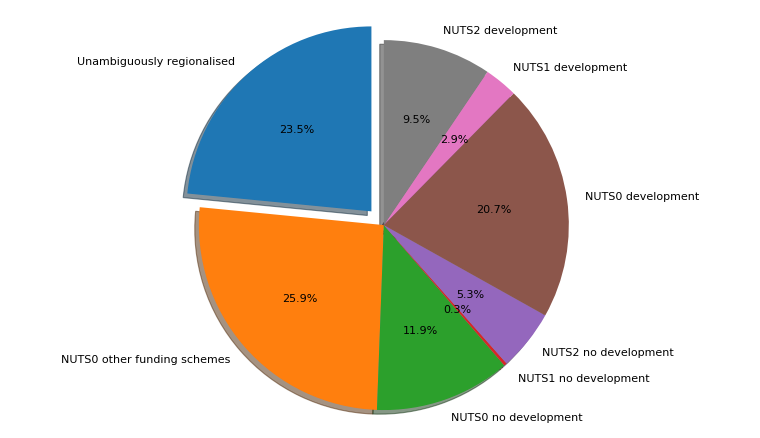

In [28]:
fig1, ax1 = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

explode = [0.1,0,0,0,0,0,0,0]
ax1.pie(pie.Amount, explode=explode, labels=pie.Types, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()